In [1]:
#Create barplots for ROI-based MVPA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
from statsmodels.stats.multitest import multipletests

In [2]:
#Set variables
subList=[1,3,5,6,7,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,27,28];
conditions_identity = ['FACE_IDENTITY', 'PLACE_IDENTITY']
conditions_nchoosek_familiarity = ['FACE_PLACE_FAMILIAR', 'FACE_PLACE_NONFAMILIAR']
conditions_nchoosek = ['FACE_PLACE', 'FACE_PLACE_FAMILIARITY', 'FACE', 'PLACE', 'FAMILIAR']
conditions_idenFam = ['FACEFAMILIAR_IDENTITY', 'PLACEFAMILIAR_IDENTITY','FACENONFAMILIAR_IDENTITY', 'PLACENONFAMILIAR_IDENTITY']
roi_list = ['V1Left', 'V1Right', 'V2Left', 'V2Right', 'FFALeft', 'FFARight', 'PPALeft', 'PPARight', 'IFGLeft', 'IFGRight', 'mPFCLeft', 'mPFCRight', 'mPrecunLeft', 'mPrecunRight', 'OFALeft', 'OFARight', 'TPJLeft', 'TPJRight', 'SPLLeft', 'SPLRight', 'aIPSLeft', 'aIPSRight']
roi = ['V1', 'V2', 'FFA', 'PPA', 'IFG', 'mPFC', 'mPrecun', 'OFA', 'TPJ', 'SPL', 'aIPS']
sheetOrder = [(1,2), (3,4), (5,6), (7,8), (9,10), (11,12), (13,14), (15,16), (17,18), (19,20), (21,22)]
pathToData_identity = r'C:\Users\flavio.ragni\Google Drive Unitn\ERC_perceptual_awareness_resting_state_project\Analyses\MVPA\regular_leaveOneRunOut\accuracyGroup_{}_sphere9_MVPA_N=23_regular_leaveOneRunOut.xls'
pathToData_nchoosek = r'C:\Users\flavio.ragni\Google Drive Unitn\ERC_perceptual_awareness_resting_state_project\Analyses\MVPA\nchoosek_leaveOneRunOut\accuracyGroup_{}_sphere9_MVPA_N=23_nchoosek_leaveOneRunOut.xls'
chance_identity = 1/4
chance_nchoosek = 1/2

In [3]:
#Load corresponding excel files as csv
d_identity = {}
d_nchoosek = {}
#Create dataset for identity decoding 
for i in conditions_identity:
    d_identity = {condition : pd.read_excel(pathToData_identity.format(condition), sheet_name=None, header=None) for condition in conditions_identity}
#Create dataset for nchoosek decoding
for i in conditions_nchoosek:
    d_nchoosek = {condition : pd.read_excel(pathToData_nchoosek.format(condition), sheet_name=None, header=None) for condition in conditions_nchoosek}
#Create dataset for nchoosek familiarity decoding
for i in conditions_nchoosek_familiarity:
    d_nchoosek_familiarity = {condition : pd.read_excel(pathToData_nchoosek.format(condition), sheet_name=None, header=None) for condition in conditions_nchoosek_familiarity}
#Create dataset for identity decoding within familiarity
for i in conditions_nchoosek:
    d_idenFam = {condition : pd.read_excel(pathToData_identity.format(condition), sheet_name=None, header=None) for condition in conditions_idenFam}


In [43]:
#Compute all p-values
#Start with identity
pvals_identity = []
pvals_identity_corr = []
pvals_nchoosek = []
pvals_nchoosek_corr = []
#First compute all pvalues for identity
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_identity = [d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_identity)):
        t, prob = stats.ttest_1samp(dataPlot_identity[h], chance_identity)
        pvals_identity.append(prob)
#Then for nchoosek
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_nchoosek = [d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_nchoosek)):
        t, prob = stats.ttest_1samp(dataPlot_nchoosek[h], chance_nchoosek)
        pvals_nchoosek.append(prob)
#Merge p values toghether in one variable
pvals_all = pvals_identity + pvals_nchoosek
#Compute FDR correction
pvals_all_corr = multipletests(pvals_all, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#Split between identity and nchoosek
pvals_identity_corr = pvals_all_corr[0][0:44]
pvals_nchoosek_corr = pvals_all_corr[0][44:]
len(pvals_identity_corr)

44

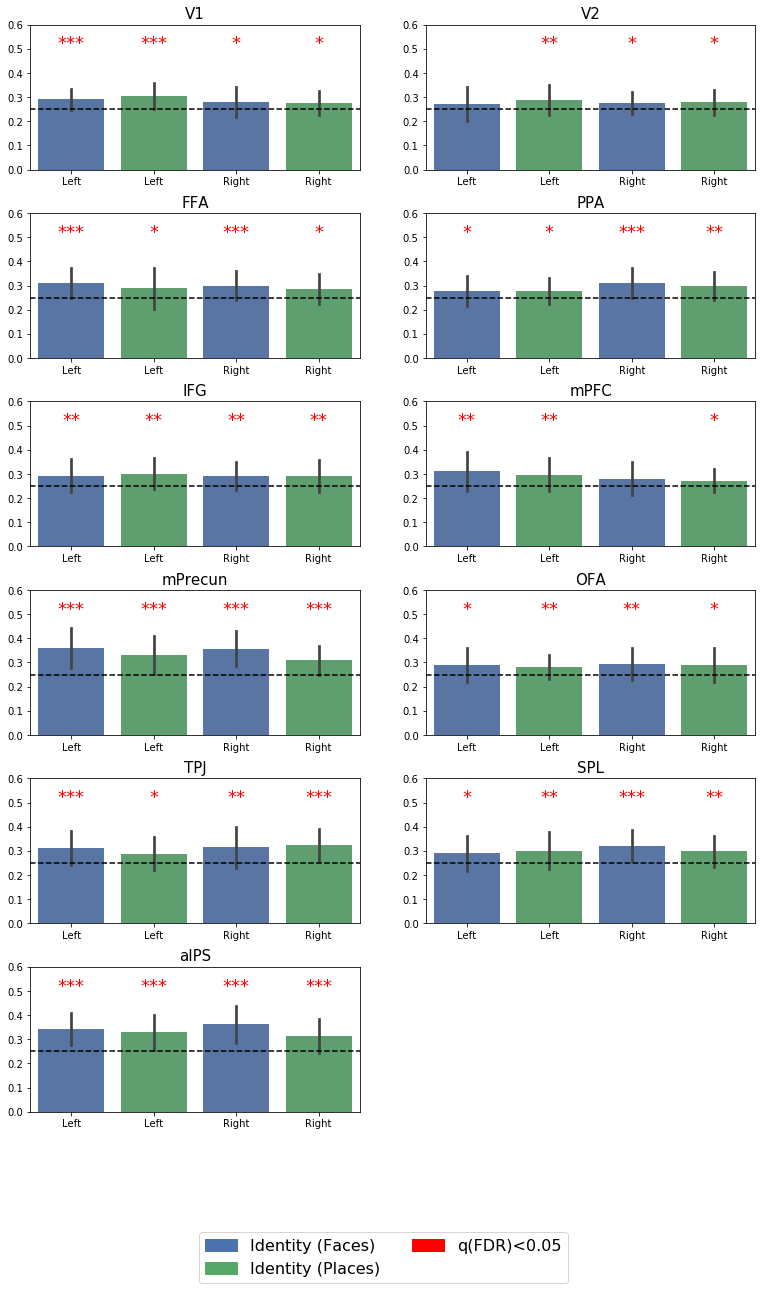

In [44]:
#Make a barplot for each ROI
pvals_identity = []
pvals_identity_corr = []
pvals_identity_corr_id = [[j for j in range((i-1)*4, i*4)] for i in range(1,len(roi) + 1)]
pvals_identity_corr_id = [[0, 1, 2, 3],[4, 5, 6, 7],[8, 9, 10, 11],[12, 13, 14, 15],[16, 17, 18, 19],[20, 21, 22, 23],
                          [24, 25, 26, 27],[28, 29, 30, 31],[32, 33, 34, 35],[36, 37, 38, 39],[40, 41, 42, 43]]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_identity = [d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_identity)):
        t, prob = stats.ttest_1samp(dataPlot_identity[h], chance_identity)
        pvals_identity.append(prob)
#Compute FDR correction
pvals_identity_corr = multipletests(pvals_identity, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)        
#Now make the plot    
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_identity = [d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_identity, ci='sd', palette=sns.color_palette(["#4c72b0","#55a868","#4c72b0","#55a868"])) 
    g.set_ylim(0, 0.6)
    g.set_xticklabels(['Left', 'Left', 'Right','Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_identity, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_identity)):
        t, prob = stats.ttest_1samp(dataPlot_identity[h], chance_identity)
        if pvals_identity_corr[0][pvals_identity_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.5,'***', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.5,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.5,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.5,'*', ha='center', fontsize=18, color='red')
        else:
            if prob < 0.001:
                g.text(h,0.5,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.5,'**', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.5,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.5,'*', ha='center', fontsize=18)
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
faceIden_patch = mpatches.Patch(color='#4c72b0', label='Identity (Faces)')
placeIden_patch = mpatches.Patch(color='#55a868', label='Identity (Places)')
FDR_patch = mpatches.Patch(color='#FF0000', label='q(FDR)<0.05')
fig.legend(handles=[faceIden_patch, placeIden_patch, FDR_patch], loc = 'lower center', ncol=2, prop={'size': 16})

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

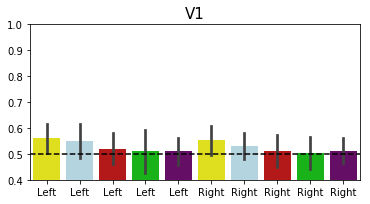

In [25]:
#Create plots for nchoosek decoding
#Make a barplot for each ROI
pvals_nchoosek = []
pvals_nchoosek_corr = []
pvals_nchoosek_corr_id = [[j for j in range((i-1)*10, i*10)] for i in range(1,len(roi) + 1)]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_nchoosek = [d_nchoosek['FACE_PLACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FAMILIAR'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE_PLACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FAMILIAR'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_nchoosek)):
        t, prob = stats.ttest_1samp(dataPlot_nchoosek[h], chance_nchoosek)
        pvals_nchoosek.append(prob)
#Compute FDR correction
pvals_nchoosek_corr = multipletests(pvals_nchoosek, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#Make a barplot for each ROI
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_nchoosek = [d_nchoosek['FACE_PLACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FAMILIAR'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE_PLACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FAMILIAR'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_nchoosek, ci='sd', palette=sns.color_palette(["#ffff00","#add8e6","#cc0000","#00cc00","#730073","#ffff00","#add8e6","#cc0000","#00cc00","#730073"])) 
    g.set_ylim(0.4, 1)
    g.set_xticklabels(['Left', 'Left', 'Left', 'Left', 'Left', 'Right', 'Right', 'Right', 'Right','Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_nchoosek, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_nchoosek)):
        t, prob = stats.ttest_1samp(dataPlot_nchoosek[h], chance_nchoosek)
        if pvals_nchoosek_corr[0][pvals_nchoosek_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.85,'***', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.85,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.85,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.85,'*', ha='center', fontsize=18, color='red')
        else:
            if prob < 0.001:
                g.text(h,0.85,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.85,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.85,'*', ha='center', fontsize=18)                
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
facePlace_patch = mpatches.Patch(color='#ffff00', label='Face vs Place')
facePlaceFamiliarity_patch = mpatches.Patch(color='#add8e6', label='Face vs Place Familiarity')
famFaces_patch = mpatches.Patch(color='#cc0000', label='Familiarity (Faces)')
famPlaces_patch = mpatches.Patch(color='#00cc00', label='Familiarity (Places)')
fam_patch = mpatches.Patch(color='#730073', label='Familiarity')
FDR_patch = mpatches.Patch(color='#FF0000', label='q(FDR)<0.05')
fig.legend(handles=[facePlace_patch, facePlaceFamiliarity_patch, famFaces_patch, famPlaces_patch, fam_patch, FDR_patch], loc = 'lower center', ncol=2, prop={'size': 16})
#Create legend for asterisks
#sig1_patch = mpatches.Patch(facecolor='#DCDCDC', hatch='*', label='p < 0.05')
#sig2_patch = mpatches.Patch(facecolor='#DCDCDC', hatch='**', label='p < 0.01')
#sig3_patch = mpatches.Patch(facecolor='#DCDCDC', hatch='***', label='p < 0.001')
#fig.legend(handles=[sig1_patch, sig2_patch, sig3_patch], loc = 'lower left')

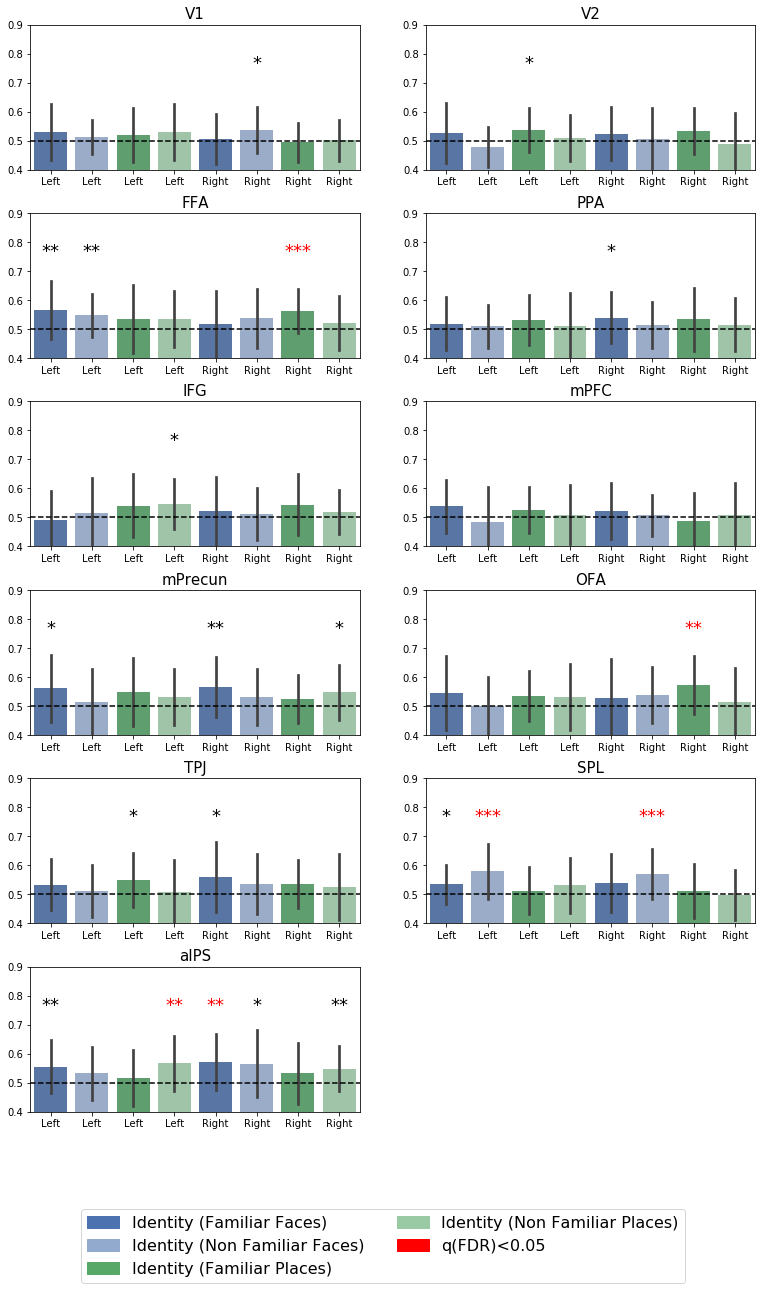

In [57]:
#Create plots for decoding identity within familiarity
#Make a barplot for each ROI
pvals_idenFam = []
pvals_idenFam_corr = []
pvals_idenFam_corr_id = [[j for j in range((i-1)*8, i*8)] for i in range(1,len(roi) + 1)]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_idenFam = [d_idenFam['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                        d_idenFam['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                        d_idenFam['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                        d_idenFam['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                        d_idenFam['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                        d_idenFam['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                        d_idenFam['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                        d_idenFam['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_idenFam)):
        t, prob = stats.ttest_1samp(dataPlot_idenFam[h], chance_nchoosek)
        pvals_idenFam.append(prob)
#Compute FDR correction
pvals_idenFam_corr = multipletests(pvals_idenFam, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_idenFam = [d_idenFam['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                        d_idenFam['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                        d_idenFam['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                        d_idenFam['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                        d_idenFam['FACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                        d_idenFam['FACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                        d_idenFam['PLACEFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                        d_idenFam['PLACENONFAMILIAR_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_idenFam, ci='sd', palette=sns.color_palette(["#4c72b0","#93aacf","#55a868","#99caa4","#4c72b0","#93aacf","#55a868","#99caa4"])) 
    g.set_ylim(0.4, 0.9)
    g.set_xticklabels(['Left', 'Left', 'Left', 'Left', 'Right','Right', 'Right','Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_nchoosek, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_idenFam)):
        t, prob = stats.ttest_1samp(dataPlot_idenFam[h], chance_nchoosek)
        if pvals_idenFam_corr[0][pvals_idenFam_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.75,'***', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.75,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.75,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.75,'*', ha='center', fontsize=18, color='red')
        else:
            if prob < 0.001:
                g.text(h,0.75,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.75,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.75,'*', ha='center', fontsize=18)                
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
faceFamIden_patch = mpatches.Patch(color='#4c72b0', label='Identity (Familiar Faces)')
faceNonFamIden_patch = mpatches.Patch(color='#93aacf', label='Identity (Non Familiar Faces)')
placeFamIden_patch = mpatches.Patch(color='#55a868', label='Identity (Familiar Places)')
placeNonFamIden_patch = mpatches.Patch(color='#99caa4', label='Identity (Non Familiar Places)')
FDR_patch = mpatches.Patch(color='#FF0000', label='q(FDR)<0.05')
fig.legend(handles=[faceFamIden_patch,faceNonFamIden_patch, placeFamIden_patch, placeNonFamIden_patch, FDR_patch], loc = 'lower center', ncol=2, prop={'size': 16})

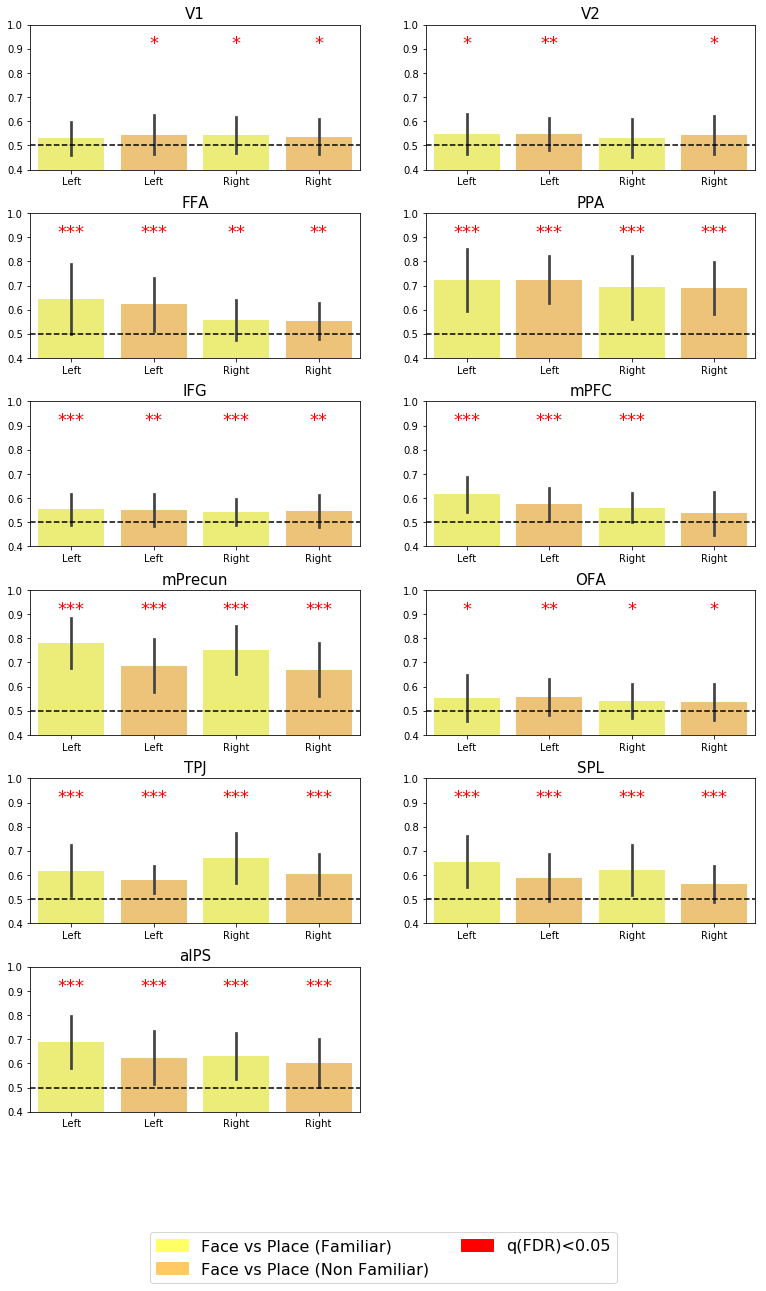

In [58]:
#Make a barplot for each ROI
pvals_nchoosek_familiarity = []
pvals_nchoosek_familiarity_corr = []
pvals_nchoosek_familiarity_corr_id = [[j for j in range((i-1)*4, i*4)] for i in range(1,len(roi) + 1)]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_nchoosek_familiarity = [d_nchoosek_familiarity['FACE_PLACE_FAMILIAR'][sheet.format(sheetOrder[i][0])][0],
                                     d_nchoosek_familiarity['FACE_PLACE_NONFAMILIAR'][sheet.format(sheetOrder[i][0])][0],
                                     d_nchoosek_familiarity['FACE_PLACE_FAMILIAR'][sheet.format(sheetOrder[i][1])][0],
                                     d_nchoosek_familiarity['FACE_PLACE_NONFAMILIAR'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_nchoosek_familiarity)):
        t, prob = stats.ttest_1samp(dataPlot_nchoosek_familiarity[h], chance_nchoosek)
        pvals_nchoosek_familiarity.append(prob)
#Compute FDR correction
pvals_nchoosek_familiarity_corr = multipletests(pvals_nchoosek_familiarity, alpha=0.05, method='fdr_bh', 
                                                is_sorted=False, returnsorted=False)
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_nchoosek_familiarity = [d_nchoosek_familiarity['FACE_PLACE_FAMILIAR'][sheet.format(sheetOrder[i][0])][0],
                                     d_nchoosek_familiarity['FACE_PLACE_NONFAMILIAR'][sheet.format(sheetOrder[i][0])][0],
                                     d_nchoosek_familiarity['FACE_PLACE_FAMILIAR'][sheet.format(sheetOrder[i][1])][0],
                                     d_nchoosek_familiarity['FACE_PLACE_NONFAMILIAR'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_nchoosek_familiarity, ci='sd', palette=sns.color_palette(["#ffff66","#ffc966","#ffff66","#ffc966"])) 
    g.set_ylim(0.4, 1)
    g.set_xticklabels(['Left', 'Left', 'Right','Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_nchoosek, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_nchoosek_familiarity)):
        t, prob = stats.ttest_1samp(dataPlot_nchoosek_familiarity[h], chance_nchoosek)
        if pvals_nchoosek_familiarity_corr[0][pvals_nchoosek_familiarity_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.9,'***', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.9,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.9,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.9,'*', ha='center', fontsize=18, color='red')
        else:
            if prob < 0.001:
                g.text(h,0.90,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.90,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.90,'*', ha='center', fontsize=18)                
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
facePlaceFam_patch = mpatches.Patch(color='#ffff66', label='Face vs Place (Familiar)')
facePlaceNonFam_patch = mpatches.Patch(color='#ffc966', label='Face vs Place (Non Familiar)')
fig.legend(handles=[facePlaceFam_patch, facePlaceNonFam_patch, FDR_patch], loc = 'lower center', ncol=2, prop={'size': 16})

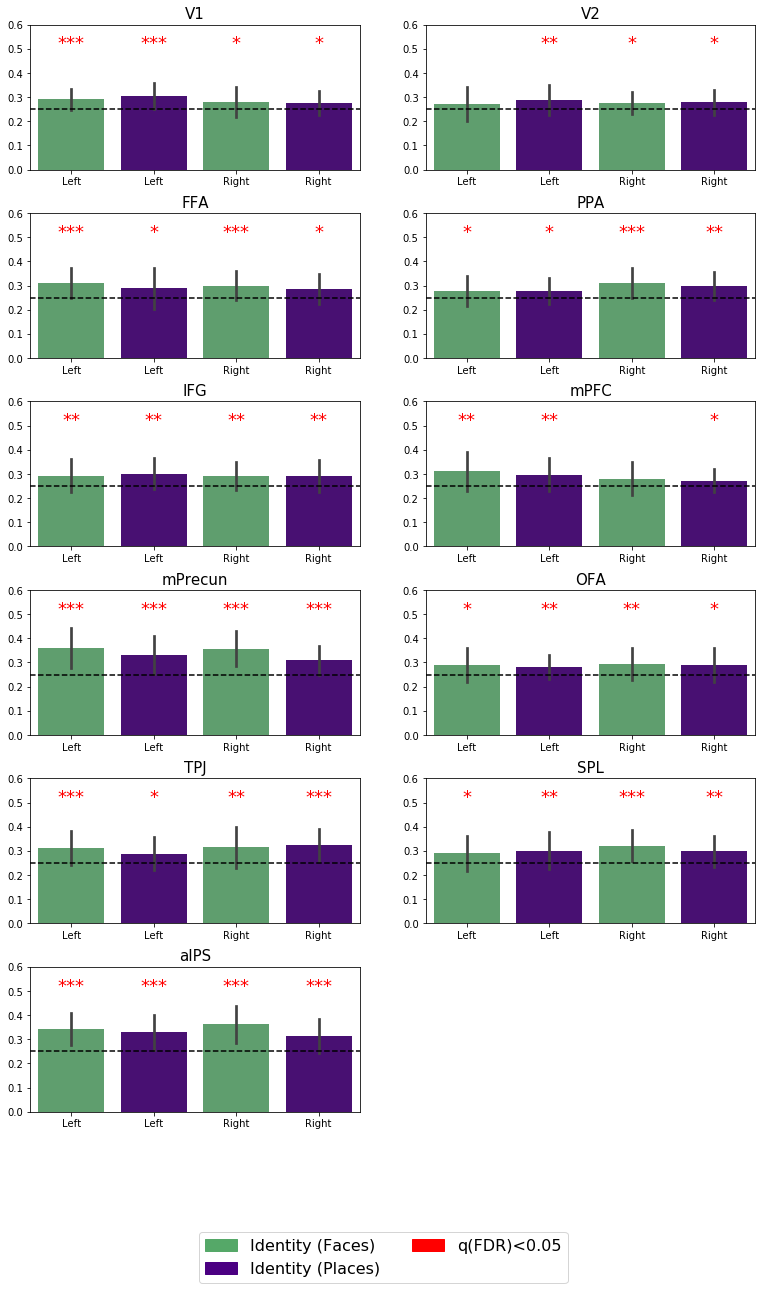

In [10]:
#Plots for SIPF 2019
#Make a barplot for each ROI
pvals_identity = []
pvals_identity_corr = []
pvals_identity_corr_id = [[j for j in range((i-1)*4, i*4)] for i in range(1,len(roi) + 1)]
#pvals_identity_corr_id = [[0, 1, 2, 3],[4, 5, 6, 7],[8, 9, 10, 11],[12, 13, 14, 15],[16, 17, 18, 19],[20, 21, 22, 23],
#                          [24, 25, 26, 27],[28, 29, 30, 31],[32, 33, 34, 35],[36, 37, 38, 39],[40, 41, 42, 43]]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_identity = [d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_identity)):
        t, prob = stats.ttest_1samp(dataPlot_identity[h], chance_identity)
        pvals_identity.append(prob)
#Compute FDR correction
pvals_identity_corr = multipletests(pvals_identity, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)        
#Now make the plot    
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_identity = [d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][0])][0],
                         d_identity['FACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0],
                         d_identity['PLACE_IDENTITY'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_identity, ci='sd', palette=sns.color_palette(["#55a868","#4b0082","#55a868","#4b0082"])) 
    g.set_ylim(0, 0.6)
    g.set_xticklabels(['Left', 'Left', 'Right','Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_identity, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_identity)):
        t, prob = stats.ttest_1samp(dataPlot_identity[h], chance_identity)
        if pvals_identity_corr[0][pvals_identity_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.5,'***', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.5,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.5,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.5,'*', ha='center', fontsize=18, color='red')
        else:
            if prob < 0.001:
                g.text(h,0.5,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.5,'**', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.5,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.5,'*', ha='center', fontsize=18)
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
faceIden_patch = mpatches.Patch(color='#55a868', label='Identity (Faces)')
placeIden_patch = mpatches.Patch(color='#4b0082', label='Identity (Places)')
FDR_patch = mpatches.Patch(color='#FF0000', label='q(FDR)<0.05')
fig.legend(handles=[faceIden_patch, placeIden_patch, FDR_patch], loc = 'lower center', ncol=2, prop={'size': 16})

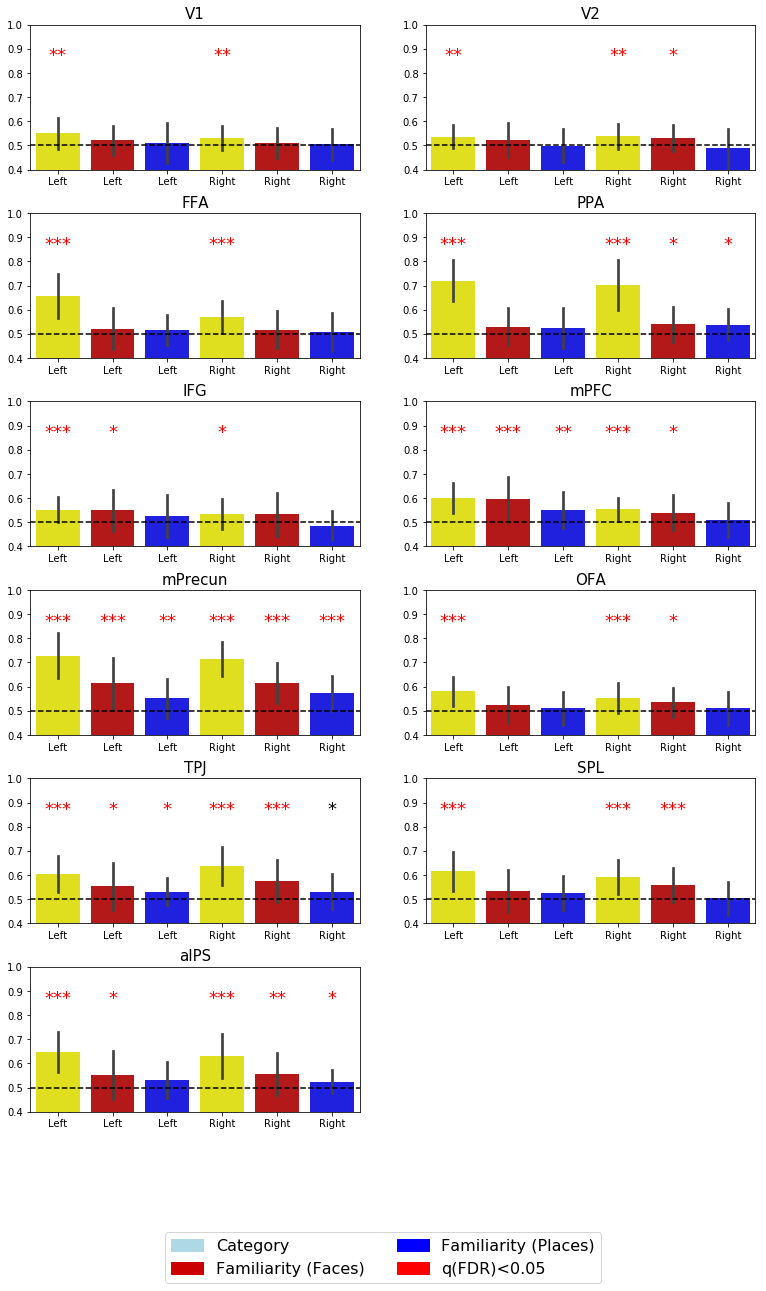

In [11]:
#Create plots for nchoosek decoding
#Make a barplot for each ROI
pvals_nchoosek = []
pvals_nchoosek_corr = []
pvals_nchoosek_corr_id = [[j for j in range((i-1)*6, i*6)] for i in range(1,len(roi) + 1)]
#First compute all pvalues and FDR correction
for i in range(len(roi)):
    sheet = 'Sheet{}'
    dataPlot_nchoosek = [d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][1])][0]]
    for h in range(len(dataPlot_nchoosek)):
        t, prob = stats.ttest_1samp(dataPlot_nchoosek[h], chance_nchoosek)
        pvals_nchoosek.append(prob)
#Compute FDR correction
pvals_nchoosek_corr = multipletests(pvals_nchoosek, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#Make a barplot for each ROI
fig = plt.figure(figsize=(13,20))
for i in range(len(roi)):
    ax = fig.add_subplot(6,2,i+1)
    sheet = 'Sheet{}'
    dataPlot_nchoosek = [d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][0])][0],
                         d_nchoosek['FACE_PLACE_FAMILIARITY'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['FACE'][sheet.format(sheetOrder[i][1])][0],
                         d_nchoosek['PLACE'][sheet.format(sheetOrder[i][1])][0]]
    g = sns.barplot(data=dataPlot_nchoosek, ci='sd', palette=sns.color_palette(["#ffff00","#cc0000","#0000ff","#ffff00","#cc0000","#0000ff"])) 
    g.set_ylim(0.4, 1)
    g.set_xticklabels(['Left', 'Left', 'Left', 'Right', 'Right', 'Right'])
    g.set_title(roi[i], fontsize=15)
    ax1 = g.axes
    ax1.axhline(chance_nchoosek, ls='--', color = 'black')
    #Set significance
    for h in range(len(dataPlot_nchoosek)):
        t, prob = stats.ttest_1samp(dataPlot_nchoosek[h], chance_nchoosek)
        if pvals_nchoosek_corr[0][pvals_nchoosek_corr_id[i][h]] == True:
            if prob < 0.001:
                g.text(h,0.85,'***', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.85,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.85,'**', ha='center', fontsize=18, color='red')
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.85,'*', ha='center', fontsize=18, color='red')
        else:
            if prob < 0.001:
                g.text(h,0.85,'***', ha='center', fontsize=18)
            elif prob >= 0.001 and prob < 0.01:
                g.text(h,0.85,'**', ha='center', fontsize=18)
            elif prob >= 0.01 and prob < 0.05:
                g.text(h,0.85,'*', ha='center', fontsize=18)                
fig.subplots_adjust(hspace=0.3)
#Create legends for comparisons
facePlaceFamiliarity_patch = mpatches.Patch(color='#ffff00', label='Category')
famFaces_patch = mpatches.Patch(color='#cc0000', label='Familiarity (Faces)')
famPlaces_patch = mpatches.Patch(color='#0000ff', label='Familiarity (Places)')
FDR_patch = mpatches.Patch(color='#FF0000', label='q(FDR)<0.05')
fig.legend(handles=[facePlaceFamiliarity_patch, famFaces_patch, famPlaces_patch, FDR_patch], loc = 'lower center', ncol=2, prop={'size': 16})
#Create legend for asterisks
#sig1_patch = mpatches.Patch(facecolor='#DCDCDC', hatch='*', label='p < 0.05')
#sig2_patch = mpatches.Patch(facecolor='#DCDCDC', hatch='**', label='p < 0.01')
#sig3_patch = mpatches.Patch(facecolor='#DCDCDC', hatch='***', label='p < 0.001')
#fig.legend(handles=[sig1_patch, sig2_patch, sig3_patch], loc = 'lower left')